In [1]:
# 책에서처럼 일단 공동 import를 하자
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 불필요한 warning이 나오지 않도록 하는 곳
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# gradient boosting을 사용
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
# mnist 데이터셋을 불러오자
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape, mnist.target.shape)

(70000, 784) (70000,)


In [18]:
# train set과 test set을 분리해야 한다.
# train과 test set을 그냥 numpy형태로 다 바꿔서 귀찮게 하지 말자.
from sklearn.model_selection import train_test_split
mnist_data = mnist.data.to_numpy()
mnist_target = mnist.target.to_numpy()
# training set을 default setting으로 해보자. 얘는 또 시간이 오래 걸리네......
# test set accuracy를 높였지만 training 시간이 너무 올라간다.... 반반으로 나눠서 다시 테스트
# 반반하고 default setting하고 일단 차이가 없네. 좀 더 줄여봐도 될 듯. training 시간은 그대로다. 
# training 시간을 줄이고 다른 변수들을 좀 더 조정하면서 overfitting은 피하고 test set의 accuracy를 올려야 한다.
# 너무 오래 걸린다. 일단은 training set을 0.1로 줄여야 하겠다. logistic regression처럼
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_target, train_size=0.1, random_state=0)
# 잘 나뉘었는가 확인
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 784)
(63000, 784)
(7000,)
(63000,)


- default : learning_rate=.1, n_estimators=100, loss='log_loss'
- 일단은 learning_rate를 .1로 고정하고 estimator를 50에서 300사이로 일단 경향을 확인해보자.
- n_estimators를 500까지 올렸음에도 그에 비례해서 계속해서 test accuracy가 올라가는데..... 어느 선까지 확인이 가능할까.
- 일단 700까지 테스트해보고 증가폭이 세번째 소수점 자리가 변화하지 않는거 같다 하면 멈추자.
- 늘리면 늘릴수록 늘어나는데????? 한계를 모르는 것인가... 근데 300을 넘어가니까 training time이 너무 늘어난다. 
- n_estimator는 350으로 고정하고 learning_rate를 조정해가면서 체크해보자
- 너무 느린데... learning rate의 영향력을 확인해보고 싶은 거니까 n=100으로 해놓고 다시 돌려보자. 그리고 jupyter notebook이 cpu를 온전히 다 활용하지 않는거 같은데 그 이유를 좀 더 찾아봐야 한다.
- learning rate 0.35일때 일단은 가장 크더라
- learning rate=0.35 n_estimator=550 train accuracy:1.0 / test accuracy:0.9431428571428572
- 결론 : learning rate=0.35 n_estimator=550일때 train accuracy : 1.0, test accuracy : 0.943인 모델이 가장 높은걸로

In [13]:
# gradiend boosting 모델을 training data를 이용해 만들자

gradboost_models = []
train_score = []
test_score = []
l_rate_01 = .1
n_estimators_list = [50,100,150,200,250,300]
for n in n_estimators_list:
    print("learning rate={} n_estimator={} train start".format(l_rate, n))
    gradboost = GradientBoostingClassifier(learning_rate=l_rate, n_estimators=n).fit(X_train, y_train)
    train_score.append(gradboost.score(X_train, y_train))
    test_score.append(gradboost.score(X_test, y_test))
    gradboost_models.append(gradboost)
    print("learning rate={} n_estimator={} train end".format(l_rate_01, n))


learning rate=0.1 n_estimator=50 train start
learning rate=0.1 n_estimator=50 train end
learning rate=0.1 n_estimator=100 train start
learning rate=0.1 n_estimator=100 train end
learning rate=0.1 n_estimator=150 train start
learning rate=0.1 n_estimator=150 train end
learning rate=0.1 n_estimator=200 train start
learning rate=0.1 n_estimator=200 train end
learning rate=0.1 n_estimator=250 train start
learning rate=0.1 n_estimator=250 train end
learning rate=0.1 n_estimator=300 train start
learning rate=0.1 n_estimator=300 train end


In [14]:
# 예측을 잘 하는가?
for i, n in enumerate(n_estimators_list):
    print("learning rate={} n_estimator={} train accuracy:{} / test accuracy:{}".format(l_rate, n, train_score[i], test_score[i]))

learning rate=0.1 n_estimator=50 train accuracy:0.9697142857142858 / test accuracy:0.9033015873015873
learning rate=0.1 n_estimator=100 train accuracy:0.9945714285714286 / test accuracy:0.9213015873015873
learning rate=0.1 n_estimator=150 train accuracy:0.9998571428571429 / test accuracy:0.9278571428571428
learning rate=0.1 n_estimator=200 train accuracy:1.0 / test accuracy:0.932063492063492
learning rate=0.1 n_estimator=250 train accuracy:1.0 / test accuracy:0.9349206349206349
learning rate=0.1 n_estimator=300 train accuracy:1.0 / test accuracy:0.9368571428571428


In [16]:
# n_estimator를 300에서 500으로 늘려서 다시 한번 테스트

gradboost_models_02 = []
train_score_02 = []
test_score_02 = []
l_rate_02 = .1
n_estimators_list_02 = [300,350,400,450,500]
for n in n_estimators_list_02:
    print("learning rate={} n_estimator={} train start".format(l_rate, n))
    gradboost = GradientBoostingClassifier(learning_rate=l_rate_02, n_estimators=n).fit(X_train, y_train)
    train_score_02.append(gradboost.score(X_train, y_train))
    test_score_02.append(gradboost.score(X_test, y_test))
    gradboost_models_02.append(gradboost)
    print("learning rate={} n_estimator={} train end".format(l_rate_02, n))

learning rate=0.1 n_estimator=300 train start
learning rate=0.1 n_estimator=300 train end
learning rate=0.1 n_estimator=350 train start
learning rate=0.1 n_estimator=350 train end
learning rate=0.1 n_estimator=400 train start
learning rate=0.1 n_estimator=400 train end
learning rate=0.1 n_estimator=450 train start
learning rate=0.1 n_estimator=450 train end
learning rate=0.1 n_estimator=500 train start
learning rate=0.1 n_estimator=500 train end


In [17]:
# 예측을 잘 하는가?
for i, n in enumerate(n_estimators_list_02):
    print("learning rate={} n_estimator={} train accuracy:{} / test accuracy:{}".format(l_rate_02, n, train_score_02[i], test_score_02[i]))

learning rate=0.1 n_estimator=300 train accuracy:1.0 / test accuracy:0.936968253968254
learning rate=0.1 n_estimator=350 train accuracy:1.0 / test accuracy:0.9384285714285714
learning rate=0.1 n_estimator=400 train accuracy:1.0 / test accuracy:0.9393809523809524
learning rate=0.1 n_estimator=450 train accuracy:1.0 / test accuracy:0.9401428571428572
learning rate=0.1 n_estimator=500 train accuracy:1.0 / test accuracy:0.9406984126984127


In [18]:
# n_estimator를 500에서 700으로 늘려서 다시 한번 테스트

gradboost_models_03 = []
train_score_03 = []
test_score_03 = []
l_rate_03 = .1
n_estimators_list_03 = [500,550,600,650,700]
for n in n_estimators_list_03:
    print("learning rate={} n_estimator={} train start".format(l_rate, n))
    gradboost = GradientBoostingClassifier(learning_rate=l_rate_03, n_estimators=n).fit(X_train, y_train)
    train_score_03.append(gradboost.score(X_train, y_train))
    test_score_03.append(gradboost.score(X_test, y_test))
    gradboost_models_03.append(gradboost)
    print("learning rate={} n_estimator={} train end".format(l_rate_03, n))

learning rate=0.1 n_estimator=500 train start
learning rate=0.1 n_estimator=500 train end
learning rate=0.1 n_estimator=550 train start
learning rate=0.1 n_estimator=550 train end
learning rate=0.1 n_estimator=600 train start
learning rate=0.1 n_estimator=600 train end
learning rate=0.1 n_estimator=650 train start
learning rate=0.1 n_estimator=650 train end
learning rate=0.1 n_estimator=700 train start
learning rate=0.1 n_estimator=700 train end


In [19]:
# 예측을 잘 하는가?
for i, n in enumerate(n_estimators_list_03):
    print("learning rate={} n_estimator={} train accuracy:{} / test accuracy:{}".format(l_rate_03, n, train_score_03[i], test_score_03[i]))

learning rate=0.1 n_estimator=500 train accuracy:1.0 / test accuracy:0.9408571428571428
learning rate=0.1 n_estimator=550 train accuracy:1.0 / test accuracy:0.9414285714285714
learning rate=0.1 n_estimator=600 train accuracy:1.0 / test accuracy:0.9419206349206349
learning rate=0.1 n_estimator=650 train accuracy:1.0 / test accuracy:0.9424761904761905
learning rate=0.1 n_estimator=700 train accuracy:1.0 / test accuracy:0.9427142857142857


In [10]:
# n_estimator는 500으로 고정하고 learning rate를 조정해가면서 그 결과를 확인해보자.

# 속도를 늘려줄까 과연?
import joblib
joblib.parallel_backend('threading', n_jobs=-1)

gradboost_models_04 = []
train_score_04 = []
test_score_04 = []
l_rate_list_04 = [0.1*i for i in range(1,10)]
n_estimators_04 = 100
for l_rate in l_rate_list_04:
    print("learning rate={} n_estimator={} train start".format(l_rate, n_estimators_04))
    gradboost = GradientBoostingClassifier(learning_rate=l_rate, n_estimators=n_estimators_04).fit(X_train, y_train)
    train_score_04.append(gradboost.score(X_train, y_train))
    test_score_04.append(gradboost.score(X_test, y_test))
    gradboost_models_04.append(gradboost)
    print("learning rate={} n_estimator={} train end".format(l_rate, n_estimators_04))

learning rate=0.1 n_estimator=100 train start
learning rate=0.1 n_estimator=100 train end
learning rate=0.2 n_estimator=100 train start
learning rate=0.2 n_estimator=100 train end
learning rate=0.30000000000000004 n_estimator=100 train start
learning rate=0.30000000000000004 n_estimator=100 train end
learning rate=0.4 n_estimator=100 train start
learning rate=0.4 n_estimator=100 train end
learning rate=0.5 n_estimator=100 train start
learning rate=0.5 n_estimator=100 train end
learning rate=0.6000000000000001 n_estimator=100 train start
learning rate=0.6000000000000001 n_estimator=100 train end
learning rate=0.7000000000000001 n_estimator=100 train start
learning rate=0.7000000000000001 n_estimator=100 train end
learning rate=0.8 n_estimator=100 train start
learning rate=0.8 n_estimator=100 train end
learning rate=0.9 n_estimator=100 train start
learning rate=0.9 n_estimator=100 train end


In [11]:
# 예측을 잘 하는가?
for i, l_rate in enumerate(l_rate_list_04):
    print("learning rate={} n_estimator={} train accuracy:{} / test accuracy:{}".format(l_rate, n_estimators_04, train_score_04[i], test_score_04[i]))

learning rate=0.1 n_estimator=100 train accuracy:0.9945714285714286 / test accuracy:0.9212698412698412
learning rate=0.2 n_estimator=100 train accuracy:1.0 / test accuracy:0.9286031746031747
learning rate=0.30000000000000004 n_estimator=100 train accuracy:1.0 / test accuracy:0.930047619047619
learning rate=0.4 n_estimator=100 train accuracy:1.0 / test accuracy:0.9284603174603174
learning rate=0.5 n_estimator=100 train accuracy:1.0 / test accuracy:0.9256507936507936
learning rate=0.6000000000000001 n_estimator=100 train accuracy:0.9992857142857143 / test accuracy:0.9077301587301587
learning rate=0.7000000000000001 n_estimator=100 train accuracy:0.9997142857142857 / test accuracy:0.9041746031746032
learning rate=0.8 n_estimator=100 train accuracy:0.9792857142857143 / test accuracy:0.8603492063492063
learning rate=0.9 n_estimator=100 train accuracy:0.9787142857142858 / test accuracy:0.8502380952380952


In [12]:
# learning rate 0.2에서 0.4 사이를 0.025 간격으로 더해서 test해보자
joblib.parallel_backend('threading', n_jobs=-1)

gradboost_models_05 = []
train_score_05 = []
test_score_05 = []
l_rate_list_05 = [0.225, 0.25, 0.275, 0.325, 0.35, 0.375]
n_estimators_05 = 100
for l_rate in l_rate_list_05:
    print("learning rate={} n_estimator={} train start".format(l_rate, n_estimators_05))
    gradboost = GradientBoostingClassifier(learning_rate=l_rate, n_estimators=n_estimators_05).fit(X_train, y_train)
    train_score_05.append(gradboost.score(X_train, y_train))
    test_score_05.append(gradboost.score(X_test, y_test))
    gradboost_models_05.append(gradboost)
    print("learning rate={} n_estimator={} train end".format(l_rate, n_estimators_05))

learning rate=0.225 n_estimator=100 train start
learning rate=0.225 n_estimator=100 train end
learning rate=0.25 n_estimator=100 train start
learning rate=0.25 n_estimator=100 train end
learning rate=0.275 n_estimator=100 train start
learning rate=0.275 n_estimator=100 train end
learning rate=0.325 n_estimator=100 train start
learning rate=0.325 n_estimator=100 train end
learning rate=0.35 n_estimator=100 train start
learning rate=0.35 n_estimator=100 train end
learning rate=0.375 n_estimator=100 train start
learning rate=0.375 n_estimator=100 train end


In [14]:
# 예측을 잘 하는가?
for i, l_rate in enumerate(l_rate_list_05):
    print("learning rate={} n_estimator={} train accuracy:{} / test accuracy:{}".format(l_rate, n_estimators_05, train_score_05[i], test_score_05[i]))

learning rate=0.225 n_estimator=100 train accuracy:1.0 / test accuracy:0.9297460317460318
learning rate=0.25 n_estimator=100 train accuracy:1.0 / test accuracy:0.9307142857142857
learning rate=0.275 n_estimator=100 train accuracy:1.0 / test accuracy:0.9305714285714286
learning rate=0.325 n_estimator=100 train accuracy:1.0 / test accuracy:0.9301746031746032
learning rate=0.35 n_estimator=100 train accuracy:1.0 / test accuracy:0.9314126984126984
learning rate=0.375 n_estimator=100 train accuracy:1.0 / test accuracy:0.9287936507936508


In [16]:
# n_estimator를 500에서 700으 사이로 설정한 다음 l_rate를 .35로 바꿔서 학습시켜보자 다시.

gradboost_models_06 = []
train_score_06 = []
test_score_06 = []
l_rate_06 = .35
n_estimators_list_06 = [500,550,600,650,700]
for n in n_estimators_list_06:
    print("learning rate={} n_estimator={} train start".format(l_rate_06, n))
    gradboost = GradientBoostingClassifier(learning_rate=l_rate_06, n_estimators=n).fit(X_train, y_train)
    train_score_06.append(gradboost.score(X_train, y_train))
    test_score_06.append(gradboost.score(X_test, y_test))
    gradboost_models_06.append(gradboost)
    print("learning rate={} n_estimator={} train end".format(l_rate_06, n))

learning rate=0.35 n_estimator=500 train start
learning rate=0.35 n_estimator=500 train end
learning rate=0.35 n_estimator=550 train start
learning rate=0.35 n_estimator=550 train end
learning rate=0.35 n_estimator=600 train start
learning rate=0.35 n_estimator=600 train end
learning rate=0.35 n_estimator=650 train start
learning rate=0.35 n_estimator=650 train end
learning rate=0.35 n_estimator=700 train start
learning rate=0.35 n_estimator=700 train end


In [17]:
# 예측을 잘 하는가?
for i, n in enumerate(n_estimators_list_06):
    print("learning rate={} n_estimator={} train accuracy:{} / test accuracy:{}".format(l_rate_06, n, train_score_06[i], test_score_06[i]))

learning rate=0.35 n_estimator=500 train accuracy:1.0 / test accuracy:0.9431269841269841
learning rate=0.35 n_estimator=550 train accuracy:1.0 / test accuracy:0.9431428571428572
learning rate=0.35 n_estimator=600 train accuracy:1.0 / test accuracy:0.943015873015873
learning rate=0.35 n_estimator=650 train accuracy:1.0 / test accuracy:0.9432063492063492
learning rate=0.35 n_estimator=700 train accuracy:1.0 / test accuracy:0.9431746031746032


prediction 1 : 5
prediction 2 : 2
prediction 3 : 3
prediction 4 : 5
prediction 5 : 8
prediction 6 : 3
prediction 7 : 9
prediction 8 : 8
prediction 9 : 9
prediction 10 : 1


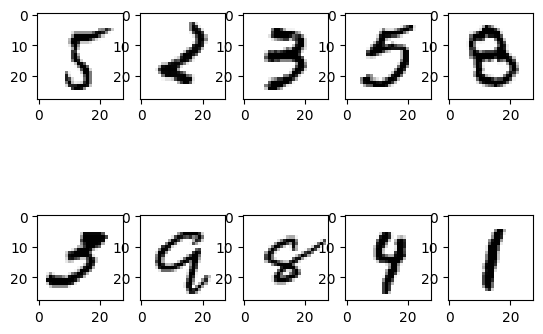

In [ ]:
# test set에서 랜덤하게 10개를 뽑은 후 이를 출력해서 예측값과 실제 값이 맞는지 틀린지 확인해보자
rand_index = np.random.randint(low=0, high=len(X_test), size=10)
for randin, i in zip(rand_index, range(1,len(rand_index)+1)):
    predict = X_test[randin].reshape(1,-1)
    print("prediction {} : {}".format(i,gradboost.predict(predict)[0]))
    plt.subplot(2,5,i)
    plt.imshow((X_test[randin].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')